<a href="https://colab.research.google.com/github/Aniketgholam/Data-Science/blob/main/WC_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv("WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [5]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


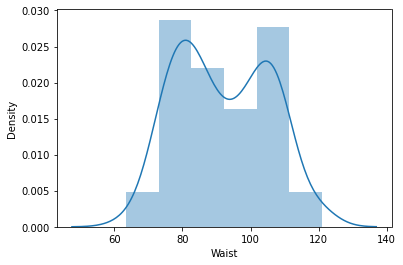

In [6]:
import seaborn as sns
sns.distplot(data['Waist'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


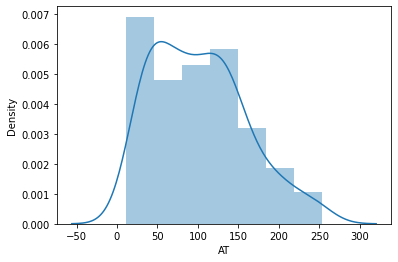

In [7]:
import seaborn as sns
sns.distplot(data['AT'])

In [15]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           1.62e-27
Time:                        06:10:35   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

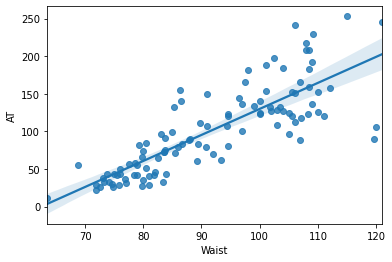

In [9]:
sns.regplot(x="Waist", y="AT", data=data);

In [10]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.670036893052843, 0.6669531256981966)

In [18]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([70,40,200])

In [19]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [20]:
model.predict(data_pred)

0     26.138669
1    -77.627112
2    475.790390
dtype: float64

In [ ]:

....